<a href="https://colab.research.google.com/github/bayuyap/Tubes_DealerKendaraan/blob/main/Tubes02_IF4304_1301194147_1301194355.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Metode Klasifikasi : Naive Bayes Algorithm

# IMPORT dan Read Dataset

In [ ]:
import numpy as nm
import pandas as pd
import numpy.matlib as np
import random as rd
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import seaborn as sns
import warnings
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [ ]:
df_test = pd.read_csv('kendaraan_test.csv')
df_train = pd.read_csv('kendaraan_train.csv')

In [ ]:
df_test

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0
...,...,...,...,...,...,...,...,...,...,...,...
47634,Pria,61,1,46,0,> 2 Tahun,Pernah,31039,124,67,0
47635,Pria,41,1,15,0,1-2 Tahun,Pernah,2630,157,232,0
47636,Pria,24,1,29,1,< 1 Tahun,Tidak,33101,152,211,0
47637,Pria,59,1,30,0,1-2 Tahun,Pernah,37788,26,239,1


In [ ]:
df_train

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,285828,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,285829,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,285830,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47639 entries, 0 to 47638
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Jenis_Kelamin      47639 non-null  object
 1   Umur               47639 non-null  int64 
 2   SIM                47639 non-null  int64 
 3   Kode_Daerah        47639 non-null  int64 
 4   Sudah_Asuransi     47639 non-null  int64 
 5   Umur_Kendaraan     47639 non-null  object
 6   Kendaraan_Rusak    47639 non-null  object
 7   Premi              47639 non-null  int64 
 8   Kanal_Penjualan    47639 non-null  int64 
 9   Lama_Berlangganan  47639 non-null  int64 
 10  Tertarik           47639 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 4.0+ MB


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


# PREPROCESSING DATA

## Drop Beberapa Kolom

In [ ]:
preprocess_train = df_train.drop(["id"],axis=1, inplace=True)

In [ ]:
df_test

,Umur,SIM,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,49,1,0,1-2 Tahun,Pernah,46963,26,145,0
1,22,1,1,< 1 Tahun,Tidak,39624,152,241,0
2,24,1,1,< 1 Tahun,Tidak,110479,152,62,0
3,46,1,1,1-2 Tahun,Tidak,36266,124,34,0
4,35,1,0,1-2 Tahun,Pernah,26963,152,229,0
...,...,...,...,...,...,...,...,...,...
47634,61,1,0,> 2 Tahun,Pernah,31039,124,67,0
47635,41,1,0,1-2 Tahun,Pernah,2630,157,232,0
47636,24,1,1,< 1 Tahun,Tidak,33101,152,211,0
47637,59,1,0,1-2 Tahun,Pernah,37788,26,239,1


In [ ]:
df_train

,Umur,SIM,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,30.0,1.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,48.0,1.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,21.0,1.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,58.0,1.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,50.0,1.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...
285826,23.0,1.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,21.0,1.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,23.0,1.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,68.0,1.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


## Pengecekan dan Drop data duplikat

In [ ]:
df_test.drop_duplicates(inplace = True)

df_test

,Umur,SIM,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,49,1,0,1-2 Tahun,Pernah,46963,26,145,0
1,22,1,1,< 1 Tahun,Tidak,39624,152,241,0
2,24,1,1,< 1 Tahun,Tidak,110479,152,62,0
3,46,1,1,1-2 Tahun,Tidak,36266,124,34,0
4,35,1,0,1-2 Tahun,Pernah,26963,152,229,0
...,...,...,...,...,...,...,...,...,...
47634,61,1,0,> 2 Tahun,Pernah,31039,124,67,0
47635,41,1,0,1-2 Tahun,Pernah,2630,157,232,0
47636,24,1,1,< 1 Tahun,Tidak,33101,152,211,0
47637,59,1,0,1-2 Tahun,Pernah,37788,26,239,1


In [ ]:
df_train.drop_duplicates(inplace = True)

df_train

,Umur,SIM,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,30.0,1.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,48.0,1.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,21.0,1.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,58.0,1.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,50.0,1.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...
285826,23.0,1.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,21.0,1.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,23.0,1.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,68.0,1.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


## Pengecekan Data Yang Kosong

In [ ]:
df_test.isnull().sum()

Umur                 0
SIM                  0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

In [ ]:
df_train.isnull().sum()

Umur                 13948
SIM                  14378
Sudah_Asuransi       14198
Umur_Kendaraan       14245
Kendaraan_Rusak      14154
Premi                13245
Kanal_Penjualan      14236
Lama_Berlangganan    12873
Tertarik                 0
dtype: int64

## Mengisi data yang kosong

In [ ]:
df_train = df_train.fillna(df_train.mean())
df_train['SIM'] = df_train['SIM'].fillna(df_train['SIM'].value_counts().index[0])
df_train['Umur_Kendaraan'] = df_train['Umur_Kendaraan'].fillna(df_train['Umur_Kendaraan'].value_counts().index[0])
df_train['Sudah_Asuransi'] = df_train['Sudah_Asuransi'].fillna(df_train['Sudah_Asuransi'].value_counts().index[0])
df_train['Kendaraan_Rusak'] = df_train['Kendaraan_Rusak'].fillna(df_train['Kendaraan_Rusak'].value_counts().index[0])
df_train['Premi'] = df_train['Premi'].fillna(df_train['Premi'].value_counts().index[0])
df_train['Lama_Berlangganan'] = df_train['Lama_Berlangganan'].fillna(df_train['Lama_Berlangganan'].value_counts().index[0])

df_train

,Umur,SIM,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,30.0,1.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,48.0,1.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,21.0,1.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,58.0,1.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,50.0,1.0,0.0,> 2 Tahun,Pernah,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...
285826,23.0,1.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,21.0,1.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,23.0,1.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,68.0,1.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


In [ ]:
df_test = df_test.fillna(df_test.median())
df_test['SIM'] = df_test['SIM'].fillna(df_test['SIM'].value_counts().index[0])
df_test['Umur_Kendaraan'] = df_test['Umur_Kendaraan'].fillna(df_test['Umur_Kendaraan'].value_counts().index[0])
df_test['Sudah_Asuransi'] = df_test['Sudah_Asuransi'].fillna(df_test['Sudah_Asuransi'].value_counts().index[0])
df_test['Kendaraan_Rusak'] = df_test['Kendaraan_Rusak'].fillna(df_test['Kendaraan_Rusak'].value_counts().index[0])
df_test['Premi'] = df_test['Premi'].fillna(df_test['Premi'].value_counts().index[0])
df_test['Lama_Berlangganan'] = df_test['Lama_Berlangganan'].fillna(df_test['Lama_Berlangganan'].value_counts().index[0])

df_test

,Umur,SIM,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,49,1,0,1-2 Tahun,Pernah,46963,26,145,0
1,22,1,1,< 1 Tahun,Tidak,39624,152,241,0
2,24,1,1,< 1 Tahun,Tidak,110479,152,62,0
3,46,1,1,1-2 Tahun,Tidak,36266,124,34,0
4,35,1,0,1-2 Tahun,Pernah,26963,152,229,0
...,...,...,...,...,...,...,...,...,...
47634,61,1,0,> 2 Tahun,Pernah,31039,124,67,0
47635,41,1,0,1-2 Tahun,Pernah,2630,157,232,0
47636,24,1,1,< 1 Tahun,Tidak,33101,152,211,0
47637,59,1,0,1-2 Tahun,Pernah,37788,26,239,1


##Mapping Dataset

In [ ]:
sizeMappingRusak = {'Pernah':1, 'Tidak':0}
df_test['Kendaraan_Rusak'] = df_test['Kendaraan_Rusak'].map(sizeMappingRusak)
sizeMapping = {'< 1 Tahun':1, '1-2 Tahun':2, '> 2 Tahun':3}
df_test['Umur_Kendaraan'] = df_test['Umur_Kendaraan'].map(sizeMapping)
sizeMappingTertarik = {1:'Tertarik', 0:'Tidak Tertarik'}
df_test['Tertarik'] = df_test['Tertarik'].map(sizeMappingTertarik)
df_test

,Umur,SIM,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,49,1,0,2,1,46963,26,145,Tidak Tertarik
1,22,1,1,1,0,39624,152,241,Tidak Tertarik
2,24,1,1,1,0,110479,152,62,Tidak Tertarik
3,46,1,1,2,0,36266,124,34,Tidak Tertarik
4,35,1,0,2,1,26963,152,229,Tidak Tertarik
...,...,...,...,...,...,...,...,...,...
47634,61,1,0,3,1,31039,124,67,Tidak Tertarik
47635,41,1,0,2,1,2630,157,232,Tidak Tertarik
47636,24,1,1,1,0,33101,152,211,Tidak Tertarik
47637,59,1,0,2,1,37788,26,239,Tertarik


In [ ]:
sizeMappingRusak = {'Pernah':1.0, 'Tidak':0.0}
df_train['Kendaraan_Rusak'] = df_train['Kendaraan_Rusak'].map(sizeMappingRusak)
sizeMapping = {'< 1 Tahun':1.0, '1-2 Tahun':2.0, '> 2 Tahun':3.0}
df_train['Umur_Kendaraan'] = df_train['Umur_Kendaraan'].map(sizeMapping)
sizeMappingTertarik = {1:'Tertarik', 0:'Tidak Tertarik'}
df_train['Tertarik'] = df_train['Tertarik'].map(sizeMappingTertarik)
df_train

,Umur,SIM,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,30.0,1.0,1.0,1.0,0.0,28029.0,152.0,97.0,Tidak Tertarik
1,48.0,1.0,0.0,3.0,1.0,25800.0,29.0,158.0,Tidak Tertarik
2,21.0,1.0,1.0,1.0,0.0,32733.0,160.0,119.0,Tidak Tertarik
3,58.0,1.0,0.0,2.0,0.0,2630.0,124.0,63.0,Tidak Tertarik
4,50.0,1.0,0.0,3.0,1.0,34857.0,88.0,194.0,Tidak Tertarik
...,...,...,...,...,...,...,...,...,...
285826,23.0,1.0,1.0,1.0,0.0,25988.0,152.0,217.0,Tidak Tertarik
285827,21.0,1.0,1.0,1.0,0.0,44686.0,152.0,50.0,Tidak Tertarik
285828,23.0,1.0,1.0,1.0,0.0,49751.0,152.0,226.0,Tidak Tertarik
285829,68.0,1.0,1.0,2.0,0.0,30503.0,124.0,270.0,Tidak Tertarik


## Melakukan konversi dari int ke float

In [ ]:
df_test = df_test.astype({"Umur" : 'float', "SIM" : 'float', "Sudah_Asuransi" : 'float', "Umur_Kendaraan" : 'float', "Kendaraan_Rusak" : 'float', "Premi" : 'float', 
                          "Kanal_Penjualan" : 'float' , "Lama_Berlangganan" : 'float'})

In [ ]:
df_test

,Umur,SIM,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,49.0,1.0,0.0,2.0,1.0,46963.0,26.0,145.0,Tidak Tertarik
1,22.0,1.0,1.0,1.0,0.0,39624.0,152.0,241.0,Tidak Tertarik
2,24.0,1.0,1.0,1.0,0.0,110479.0,152.0,62.0,Tidak Tertarik
3,46.0,1.0,1.0,2.0,0.0,36266.0,124.0,34.0,Tidak Tertarik
4,35.0,1.0,0.0,2.0,1.0,26963.0,152.0,229.0,Tidak Tertarik
...,...,...,...,...,...,...,...,...,...
47634,61.0,1.0,0.0,3.0,1.0,31039.0,124.0,67.0,Tidak Tertarik
47635,41.0,1.0,0.0,2.0,1.0,2630.0,157.0,232.0,Tidak Tertarik
47636,24.0,1.0,1.0,1.0,0.0,33101.0,152.0,211.0,Tidak Tertarik
47637,59.0,1.0,0.0,2.0,1.0,37788.0,26.0,239.0,Tertarik


## Mencari Korelasi Antar Data Dengan Heatmap

In [ ]:
correlation_train = df_train.corr()
correlation_test = df_test.corr()
correlation_test

,Umur,SIM,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
Umur,1.000000,-0.079825,-0.247812,0.766229,0.259840,0.077422,-0.580053,-0.002278
SIM,-0.079825,1.000000,0.012282,-0.042956,-0.011989,-0.010090,0.048117,-0.003981
Sudah_Asuransi,-0.247812,0.012282,1.000000,-0.376424,-0.822727,0.002263,0.208065,-0.002881
Umur_Kendaraan,0.766229,-0.042956,-0.376424,1.000000,0.391540,0.050173,-0.549392,0.002494
Kendaraan_Rusak,0.259840,-0.011989,-0.822727,0.391540,1.000000,0.011458,-0.212931,0.003759
Premi,0.077422,-0.010090,0.002263,0.050173,0.011458,1.000000,-0.122238,-0.005407
Kanal_Penjualan,-0.580053,0.048117,0.208065,-0.549392,-0.212931,-0.122238,1.000000,-0.000343
Lama_Berlangganan,-0.002278,-0.003981,-0.002881,0.002494,0.003759,-0.005407,-0.000343,1.000000


In [ ]:
correlation_train

,Umur,SIM,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
Umur,1.000000,-0.075379,-0.239023,0.717014,0.245904,0.054179,-0.545745,0.000302
SIM,-0.075379,1.000000,0.015122,-0.034308,-0.016335,-0.009764,0.041152,-0.001228
Sudah_Asuransi,-0.239023,0.015122,1.000000,-0.353330,-0.762384,0.009319,0.208431,0.002490
Umur_Kendaraan,0.717014,-0.034308,-0.353330,1.000000,0.360748,0.027702,-0.513369,-0.002209
Kendaraan_Rusak,0.245904,-0.016335,-0.762384,0.360748,1.000000,0.003815,-0.207859,-0.000882
Premi,0.054179,-0.009764,0.009319,0.027702,0.003815,1.000000,-0.101700,-0.000468
Kanal_Penjualan,-0.545745,0.041152,0.208431,-0.513369,-0.207859,-0.101700,1.000000,0.000251
Lama_Berlangganan,0.000302,-0.001228,0.002490,-0.002209,-0.000882,-0.000468,0.000251,1.000000


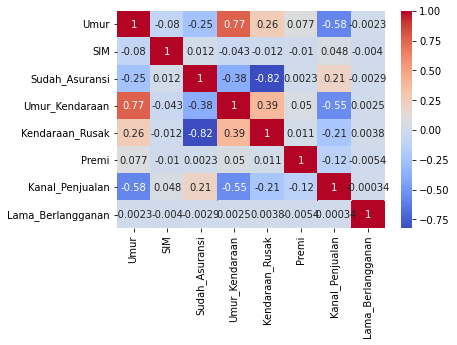

In [ ]:
sns.heatmap(correlation_test, annot= True, cmap='coolwarm', xticklabels=correlation_test.columns, yticklabels=correlation_test.columns)

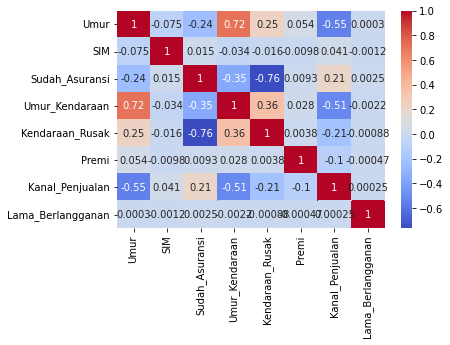

In [ ]:
sns.heatmap(correlation_train, annot=True, cmap='coolwarm', xticklabels=correlation_train.columns, yticklabels=correlation_train.columns)

#Implementasi Algoritma Naive Bayes

##Menentukan Features dan Target dari dataset

In [ ]:
df_test = df_test[["Umur",  "Premi", "Kanal_Penjualan", "Lama_Berlangganan","Tertarik"]]
df_train = df_train[["Umur",  "Premi", "Kanal_Penjualan", "Lama_Berlangganan", "Tertarik"]]
testFeatures = df_test.iloc[:, :-1]
trainFeatures = df_train.iloc[:, :-1]
testTarget = df_test.iloc[:,-1]
trainTarget = df_train.iloc[:, -1]

In [ ]:
df_test

,Umur,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,49.0,46963.0,26.0,145.0,Tidak Tertarik
1,22.0,39624.0,152.0,241.0,Tidak Tertarik
2,24.0,110479.0,152.0,62.0,Tidak Tertarik
3,46.0,36266.0,124.0,34.0,Tidak Tertarik
4,35.0,26963.0,152.0,229.0,Tidak Tertarik
...,...,...,...,...,...
47634,61.0,31039.0,124.0,67.0,Tidak Tertarik
47635,41.0,2630.0,157.0,232.0,Tidak Tertarik
47636,24.0,33101.0,152.0,211.0,Tidak Tertarik
47637,59.0,37788.0,26.0,239.0,Tertarik


In [ ]:
df_train

,Umur,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,30.0,28029.0,152.0,97.0,Tidak Tertarik
1,48.0,25800.0,29.0,158.0,Tidak Tertarik
2,21.0,32733.0,160.0,119.0,Tidak Tertarik
3,58.0,2630.0,124.0,63.0,Tidak Tertarik
4,50.0,34857.0,88.0,194.0,Tidak Tertarik
...,...,...,...,...,...
285826,23.0,25988.0,152.0,217.0,Tidak Tertarik
285827,21.0,44686.0,152.0,50.0,Tidak Tertarik
285828,23.0,49751.0,152.0,226.0,Tidak Tertarik
285829,68.0,30503.0,124.0,270.0,Tidak Tertarik


##Algoritma Naive Bayes 

In [ ]:
class NaiveBayesClassifier():
    '''
    Rumus Algoritma Naive Bayes
    P(y|X) = P(X|y) * P(y) / P(X)
    '''
    def calc_prior(self, features, target):
        '''
        prior probability P(y)
        menghitung probabilitas prior
        '''
        self.prior = (features.groupby(target).apply(lambda x: len(x)) / self.rows).to_numpy()

        return self.prior
    
    def calc_statistics(self, features, target):
        '''
        Menghitung Mean, variance untuk tiap kolom lalu dikonversi ke numpy array
        ''' 
        self.mean = features.groupby(target).apply(np.mean).to_numpy()
        self.var = features.groupby(target).apply(np.var).to_numpy()
              
        return self.mean, self.var
    
    def gaussian_density(self, class_idx, x):     
        '''
        Menghitung probabilitas dengan gaussian density function 
        
        rumus probability density function dari wikipedia:
        (1/√2pi*σ) * exp((-1/2)*((x-μ)^2)/(2*σ²)), dimana μ adalah mean, σ² adalah variance, σ adalah standar derivasi (akar dari variance )
        '''
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        numerator = np.exp((-1/2)*((x-mean)**2) / (2 * var))
#         numerator = np.exp(-((x-mean)**2 / (2 * var)))
        denominator = np.sqrt(2 * np.pi * var)
        prob = numerator / denominator
        return prob
    
    def calc_posterior(self, x):
        posteriors = []
        # menghitung probabilitas posterior untuk tiap kolom
        for i in range(self.count):
            prior = np.log(self.prior[i]) 
            conditional = np.sum(np.log(self.gaussian_density(i, x))) 
            posterior = prior + conditional
            posteriors.append(posterior)
        return self.classes[np.argmax(posteriors)]
     

    def fit(self, features, target):
        self.classes = np.unique(target)
        self.count = len(self.classes)
        self.feature_nums = features.shape[1]
        self.rows = features.shape[0]
        
        self.calc_statistics(features, target)
        self.calc_prior(features, target)
        
    def predict(self, features):
        preds = [self.calc_posterior(f) for f in features.to_numpy()]
        return preds

    def accuracy(self, y_test, y_pred):
        accuracy = np.sum(y_test == y_pred) / len(y_test)
        return accuracy

    def visualize(self, y_true, y_pred, target):
        
        tr = pd.DataFrame(data=y_true, columns=[target])
        pr = pd.DataFrame(data=y_pred, columns=[target])
        
        
        fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(15,6))
        
        sns.countplot(x=target, data=tr, ax=ax[0], palette='viridis', alpha=0.7, hue=target, dodge=False)
        sns.countplot(x=target, data=pr, ax=ax[1], palette='viridis', alpha=0.7, hue=target, dodge=False)
        

        fig.suptitle('True vs Predicted Comparison', fontsize=20)

        ax[0].tick_params(labelsize=12)
        ax[1].tick_params(labelsize=12)
        ax[0].set_title("True values", fontsize=18)
        ax[1].set_title("Predicted values", fontsize=18)
        plt.show()

###Main Program

In [ ]:
modelNB = NaiveBayesClassifier()
modelNBTrain = NaiveBayesClassifier()
modelNBTrain.fit(trainFeatures, trainTarget)

In [ ]:
predictionsTest = modelNB.predict(testFeatures)

In [ ]:
modelNB.accuracy(testTarget,predictionsTest)

0.8760912656572899

In [ ]:
predictionsTrain = modelNBTrain.predict(trainFeatures)

In [ ]:
modelNBTrain.accuracy(trainTarget, predictionsTrain)

0.875595577746077

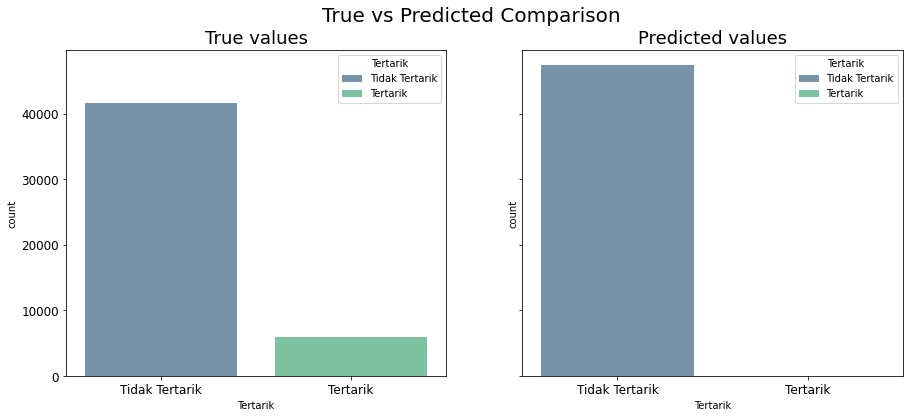

In [ ]:
modelNB.visualize(testTarget, predictionsTest, 'Tertarik')

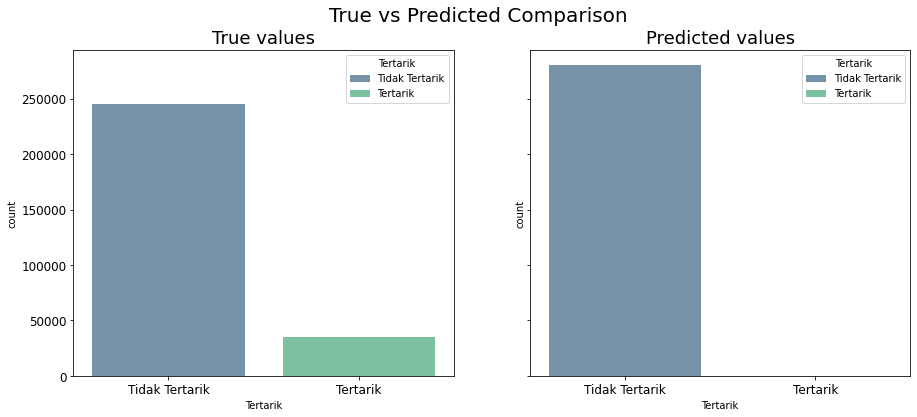

In [ ]:
modelNBTrain.visualize(trainTarget, predictionsTrain, 'Tertarik')

##Membandingkan Algoritma from scratch dengan library sklearn

In [ ]:
# Membandingkan hasil dengan library sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [ ]:
clf = GaussianNB()

In [ ]:
clf.fit(testFeatures,testTarget)

GaussianNB()

In [ ]:
clf.fit(trainFeatures,trainTarget)

GaussianNB()

In [ ]:
preds = clf.predict(testFeatures)

In [ ]:
predsTrain = clf.predict(trainFeatures)

In [ ]:
preds

array(['Tidak Tertarik', 'Tidak Tertarik', 'Tidak Tertarik', ...,
       'Tidak Tertarik', 'Tidak Tertarik', 'Tidak Tertarik'], dtype='<U14')

In [ ]:
predsTrain

array(['Tidak Tertarik', 'Tidak Tertarik', 'Tidak Tertarik', ...,
       'Tidak Tertarik', 'Tidak Tertarik', 'Tidak Tertarik'], dtype='<U14')

In [ ]:
clf.score(testFeatures,testTarget)

0.8757116949938847

In [ ]:
clf.score(trainFeatures,trainTarget)

0.8748074179743224

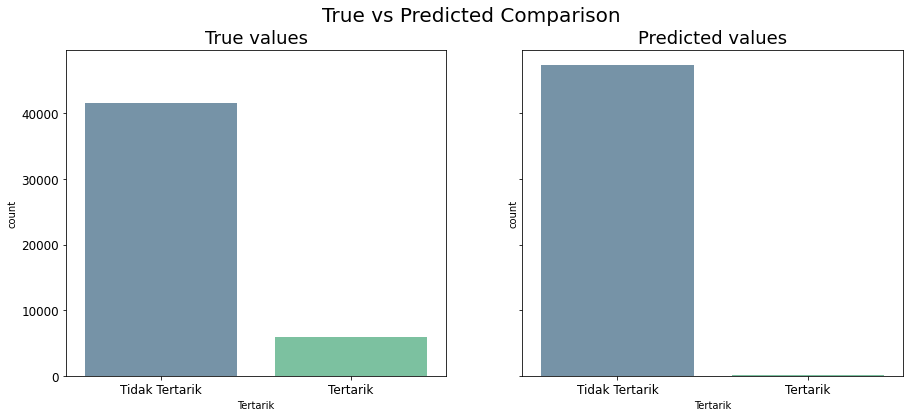

In [ ]:
tr = pd.DataFrame(data=testTarget, columns=['Tertarik'])
pr = pd.DataFrame(data=preds, columns=['Tertarik'])


fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(15,6))

sns.countplot(x='Tertarik', data=tr, ax=ax[0], palette='viridis', alpha=0.7)
sns.countplot(x='Tertarik', data=pr, ax=ax[1], palette='viridis', alpha=0.7)


fig.suptitle('True vs Predicted Comparison', fontsize=20)

ax[0].tick_params(labelsize=12)
ax[1].tick_params(labelsize=12)
ax[0].set_title("True values", fontsize=18)
ax[1].set_title("Predicted values", fontsize=18)
plt.show()

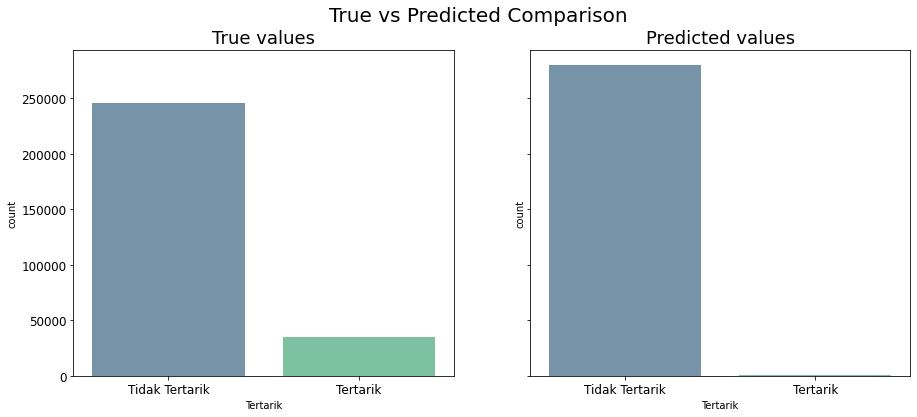

In [ ]:
tr = pd.DataFrame(data=trainTarget, columns=['Tertarik'])
pr = pd.DataFrame(data=predsTrain, columns=['Tertarik'])


fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(15,6))

sns.countplot(x='Tertarik', data=tr, ax=ax[0], palette='viridis', alpha=0.7)
sns.countplot(x='Tertarik', data=pr, ax=ax[1], palette='viridis', alpha=0.7)


fig.suptitle('True vs Predicted Comparison', fontsize=20)

ax[0].tick_params(labelsize=12)
ax[1].tick_params(labelsize=12)
ax[0].set_title("True values", fontsize=18)
ax[1].set_title("Predicted values", fontsize=18)
plt.show()